> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [253]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [305]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_gdp = df_gdp.iloc[:, np.r_[0, -54:-4]]
df_co2.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [255]:
df_co2 = df_co2.iloc[:, np.r_[0, -50:0]]
df_co2.head()

,geo,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.101,0.108,0.124,0.116,0.0868,0.150,0.166,0.131,0.136,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,1.150,1.310,1.340,1.500,1.5500,1.740,1.980,2.500,2.290,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,0.522,0.649,0.632,0.659,0.7970,1.040,1.250,1.840,2.420,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.192,0.246,0.155,0.256,0.4200,0.529,0.492,0.635,0.671,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [256]:
df = df_co2.melt(id_vars='geo', var_name='year', value_name='co2').set_index(['geo','year'])
#df = df.groupby(['geo', 'year']).mean()
#df[df['year'] == '2014']
#df.loc[(slice(None), slice('1965')), :]
#df.loc[('Armenia', '1965'):('Armenia', '2014')]
df

,,co2
geo,year,
Afghanistan,1965,0.1010
Albania,1965,1.1500
Algeria,1965,0.5220
Andorra,1965,NaN
Angola,1965,0.1920
Antigua and Barbuda,1965,2.4700
Argentina,1965,2.6400
Armenia,1965,1.5000
Australia,1965,10.6000


In [257]:
df_gdp = df_gdp.melt(id_vars='geo', var_name='year', value_name='gdp').set_index(['geo','year'])
df_gdp

,,gdp
geo,year,
Afghanistan,1965,1190
Albania,1965,3220
Algeria,1965,5960
Andorra,1965,22500
Angola,1965,4960
Antigua and Barbuda,1965,4980
Argentina,1965,10300
Armenia,1965,2950
Australia,1965,16600


In [258]:
df_merged = df.merge(df_gdp, on=['geo','year'])
df_merged

,,co2,gdp
geo,year,,
Afghanistan,1965,0.1010,1190
Albania,1965,1.1500,3220
Algeria,1965,0.5220,5960
Andorra,1965,NaN,22500
Angola,1965,0.1920,4960
Antigua and Barbuda,1965,2.4700,4980
Argentina,1965,2.6400,10300
Armenia,1965,1.5000,2950
Australia,1965,10.6000,16600


In [283]:
df_merged = df_merged.swaplevel()  #[df_merged['year'] == '2014']
df_merged.head()

co2    gdp
year geo                      
1965 Afghanistan  0.101   1190
     Albania      1.150   3220
     Algeria      0.522   5960
     Andorra        NaN  22500
     Angola       0.192   4960

In [286]:
df_merged.query('year == "2014"')

co2    gdp
year geo                                   
2014 Afghanistan              0.2990   1780
     Albania                  1.9600  10700
     Algeria                  3.7200  13500
     Andorra                  5.8300  44900
     Angola                   1.2900   6260
     Antigua and Barbuda      5.3800  19500
     Argentina                4.7500  18800
     Armenia                  1.9000   7970
     Australia               15.4000  43400
     Austria                  6.8000  44100
     Azerbaijan               3.9400  16700
     Bahamas                  6.3200  22300
     Bahrain                 23.4000  44400
     Bangladesh               0.4590   2970
     Barbados                 4.4900  15300
     Belarus                  6.6900  17900
     Belgium                  8.3200  41400
     Belize                   1.4100   8050
     Benin                    0.6140   2000
     Bhutan                   1.2900   7370
     Bolivia                  1.9300   6330
     Bosnia and Herzegovina   6.2300  10500
     Botswana                 3.2400  15900
     Brazil                   2.5900  15400
     Brunei                  22.1000  76100
     Bulgaria                 5.8700  16300
     Burkina Faso             0.1620   1540
     Burundi                  0.0445    803
     Cambodia                 0.4380   3120
     Cameroon                 0.3150   2900
...                              ...    ...
     Sudan                    0.4070   4190
     Suriname                 3.6300  15300
     Swaziland                0.9290   8080
     Sweden                   4.4800  44200
     Switzerland              4.2900  56700
     Syria                    1.6000   4300
     Tajikistan               0.6200   2550
     Tanzania                 0.2210   2400
     Thailand                 4.6200  14900
     Timor-Leste              0.3870   2110
     Togo                     0.3630   1320
     Tonga                    1.1400   5030
     Trinidad and Tobago     34.2000  31600
     Tunisia                  2.5900  10800
     Turkey                   4.4900  22400
     Turkmenistan            12.5000  14300
     Tuvalu                   1.0100   3270
     Uganda                   0.1350   1670
     Ukraine                  5.0600   8240
     United Arab Emirates    23.3000  64100
     United Kingdom           6.4600  38000
     United States           16.5000  51800
     Uruguay                  1.9700  19800
     Uzbekistan               3.4500   5370
     Vanuatu                  0.5950   2890
     Venezuela                6.0300  16700
     Vietnam                  1.8000   5370
     Yemen                    0.8650   3770
     Zambia                   0.2880   3630
     Zimbabwe                 0.7800   1910

[191 rows x 2 columns]

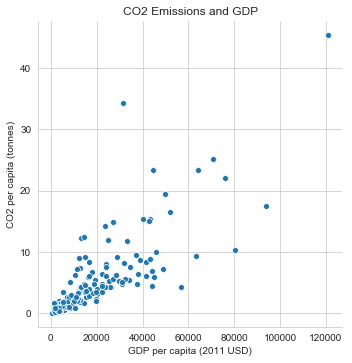

In [304]:
#sns.set_style("whitegrid")
ax = sns.relplot(x="gdp", y="co2", data=df_merged.query('year == "2014"'))
ax.set(xlabel='GDP per capita (2011 USD)', ylabel='CO2 per capita (tonnes)', title='CO2 Emissions and GDP');

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!